In [1]:
import pandas as pd
#import matplotlib.pylot as plt
import plotly.express as px
import streamlit as st

In [2]:
import os #Check directories and confirm files are in place
os.chdir("C:/Users/danby/Documents/My Projects/ex_1")
print('Current working directory:', os.getcwd())
print('Files in current directory', os.listdir('.'))

Current working directory: C:\Users\danby\Documents\My Projects\ex_1
Files in current directory ['.git', '.gitignore', '.ipynb_checkpoints', '.streamlit', '.venv', '.vscode', 'app.py', 'ex1', 'my_script.py', 'README.md', 'requirements.txt', 'Sprint4EDA.ipynb', 'untitled.py', 'vehicles_us.csv']


In [3]:
df = pd.read_csv('vehicles_us.csv') #Create dataframe and load up data files

In [4]:
print(df)
print(df.info(show_counts=True))
print(df.duplicated().sum())
print(df.isnull().sum())


       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

In [5]:
# Fill NaNs in numeric columns with 0
df['model_year'] = df['model_year'].fillna(0)
df['cylinders'] = df['cylinders'].fillna(0)
df['odometer'] = df['odometer'].fillna(0)
df['is_4wd'] = df['is_4wd'].fillna(0)

# Fill NaNs in string columns with 'Unknown'
df['paint_color'] = df['paint_color'].fillna('Unknown')

# Filter out rows where key numeric values are 0
df = df[
    (df['model_year'] != 0) &
    (df['odometer'] != 0)
]

print(df)


print(df)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5      14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6      12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
...      ...         ...             ...        ...        ...  ...       ...   
51518   3750      2005.0     ford taurus  excellent        6.0  gas  110200.0   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   

      transmission   type p

In [6]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [7]:
print("Model Year:")
print(df['model_year'].describe())

Model Year:
count    40391.000000
mean      2009.758312
std          6.246486
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


In [8]:
print("\nCylinders:")
print(df['cylinders'].describe())


Cylinders:
count    40391.000000
mean         5.507143
std          2.433598
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64


In [9]:
print("\nOdometer:")
print(df['odometer'].describe())


Odometer:
count     40391.000000
mean     115916.968854
std       64921.176275
min           1.000000
25%       70465.000000
50%      113071.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64


In [10]:
print("\nis_4wd:")
print(df['is_4wd'].describe())


is_4wd:
count    40391.000000
mean         0.497586
std          0.500000
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_4wd, dtype: float64


In [11]:
# Check the shape of original data
print("Original data shape:", df.shape)

# Look at the first few rows of these specific columns
print("\nFirst 10 rows of key columns:")
print(df[['model_year', 'cylinders', 'is_4wd']].head(10))

# Check for 0 values in each column
print("\nCount of 0 values in each column:")
print("model_year zeros:", (df['model_year'] == 0).sum())
print("cylinders zeros:", (df['cylinders'] == 0).sum()) 
print("is_4wd zeros:", (df['is_4wd'] == 0).sum())

Original data shape: (40391, 13)

First 10 rows of key columns:
    model_year  cylinders  is_4wd
0       2011.0        6.0     1.0
2       2013.0        4.0     0.0
4       2017.0        4.0     0.0
5       2014.0        6.0     1.0
6       2015.0        4.0     0.0
7       2013.0        6.0     1.0
8       2012.0        4.0     1.0
9       2008.0        0.0     1.0
10      2011.0        8.0     1.0
11      2012.0        4.0     0.0

Count of 0 values in each column:
model_year zeros: 0
cylinders zeros: 4126
is_4wd zeros: 20293


In [12]:
# Check data types
print("Data types:")
print(df[['model_year', 'cylinders', 'odometer', 'is_4wd']].dtypes)

# Check for actual zero values more carefully
print("\nActual zero counts:")
print("model_year == 0:", (df['model_year'] == 0).sum())
print("cylinders == 0:", (df['cylinders'] == 0).sum())
print("odometer == 0:", (df['odometer'] == 0).sum())
print("is_4wd == 0:", (df['is_4wd'] == 0).sum())

# Check unique values in is_4wd to understand what it represents
print("\nUnique values in is_4wd:")
print((df['is_4wd'].unique()))

Data types:
model_year    float64
cylinders     float64
odometer      float64
is_4wd        float64
dtype: object

Actual zero counts:
model_year == 0: 0
cylinders == 0: 4126
odometer == 0: 0
is_4wd == 0: 20293

Unique values in is_4wd:
[1. 0.]


In [13]:
# Check what the zero values look like as text
print("Sample of model_year values:")
print(df['model_year'].value_counts().head(10))

print("\nSample of cylinders values:")
print(df['cylinders'].value_counts().head(10))

print("\nSample of is_4wd values:")
print(df['is_4wd'].value_counts())

Sample of model_year values:
model_year
2013.0    2972
2012.0    2929
2014.0    2895
2011.0    2859
2015.0    2793
2016.0    2503
2008.0    2436
2010.0    2286
2007.0    2258
2017.0    2028
Name: count, dtype: int64

Sample of cylinders values:
cylinders
8.0     12477
6.0     12335
4.0     10776
0.0      4126
10.0      435
5.0       212
3.0        29
12.0        1
Name: count, dtype: int64

Sample of is_4wd values:
is_4wd
0.0    20293
1.0    20098
Name: count, dtype: int64


In [14]:
# Filter out columns with invalid values
clean_df = df[((df['model_year'] != 0) & (df['cylinders'] != 0) & (df['odometer'] != 0))]
clean_df
print("Before:", len(df))
print("After:", len(clean_df))

Before: 40391
After: 36265


In [15]:
# Check the data types
print(clean_df['odometer'].dtype)

# Look for non-numeric values
print(clean_df['odometer'].value_counts().tail(10))

# Check for missing values
print(clean_df['odometer'].isnull().sum())

float64
odometer
188963.0    1
111871.0    1
206033.0    1
57591.0     1
78468.0     1
51200.0     1
75167.0     1
136782.0    1
166161.0    1
46621.0     1
Name: count, dtype: int64
0


In [16]:
# Check what non-numeric values exist
non_numeric = clean_df[pd.to_numeric(clean_df['odometer'], errors='coerce').isnull()]
print("Non-numeric odometer values:")
print(non_numeric['odometer'].value_counts())

Non-numeric odometer values:
Series([], Name: count, dtype: int64)


In [17]:
# Convert to numeric, replacing any non-numeric values with NaN
clean_df.loc[:, 'odometer'] = pd.to_numeric(clean_df['odometer'], errors='coerce')

# Remove rows where odometer is NaN (if you want to)
clean_df = clean_df.dropna(subset=['odometer'])
clean_df

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5      14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6      12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
...      ...         ...             ...        ...        ...  ...       ...   
51518   3750      2005.0     ford taurus  excellent        6.0  gas  110200.0   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   

      transmission   type paint_color  is_4wd date_posted  days_listed  
0        automatic    SUV     Unknown     1.0  2018-06-23           19  
2        automatic  sedan         red     0.0  2019-02-07           79  
4        automatic  sedan       black     0.0  2019-04-02           28  
5        automatic  sedan       black     1.0  2018-06-20           15  
6        automatic  sedan       white     0.0  2018-12-27           73  
...            ...    ...         ...     ...         ...          ...  
51518    automatic  sedan      silver     0.0  2018-08-10           63  
51520    automatic  sedan       black     0.0  2018-10-03           37  
51521    automatic  sedan       white     0.0  2018-11-14           22  
51522    automatic  sedan        blue     0.0  2018-11-15           32  
51523    automatic  sedan       black     0.0  2018-07-02           71  

[36265 rows x 13 columns]

In [18]:
print(clean_df['odometer'].dtype)
print(clean_df['odometer'].head())
print(clean_df['odometer'].isnull().sum())
print(clean_df['odometer'].unique()[:10])  # Show first 10 unique values

float64
0    145000.0
2    110000.0
4     80903.0
5     57954.0
6     79212.0
Name: odometer, dtype: float64
0
[145000. 110000.  80903.  57954.  79212. 109473. 104174. 128413. 111142.
 140742.]


In [19]:
# Convert odometer from text to actual numbers
clean_df['odometer'] = pd.to_numeric(clean_df['odometer'], errors='coerce')

# Now check the data type
print(clean_df['odometer'].dtype)  # Should show 'float64'

float64


In [20]:
print(clean_df['odometer'].dtype) # Should be 'float64' or 'int64'
print(clean_df['odometer'].head())  # Should show numbers without quotes

float64
0    145000.0
2    110000.0
4     80903.0
5     57954.0
6     79212.0
Name: odometer, dtype: float64


In [21]:
# Car prices
fig = px.histogram(clean_df, x='price')
fig.show()

In [22]:
# Distribution of car years
fig = px.histogram(clean_df, x='model_year', title='Distribution of Model Year')
fig.show()

In [23]:
# Distribution of odometer readings
fig = px.histogram(clean_df, x='odometer', title='Distribution of Mileage')
fig.show()

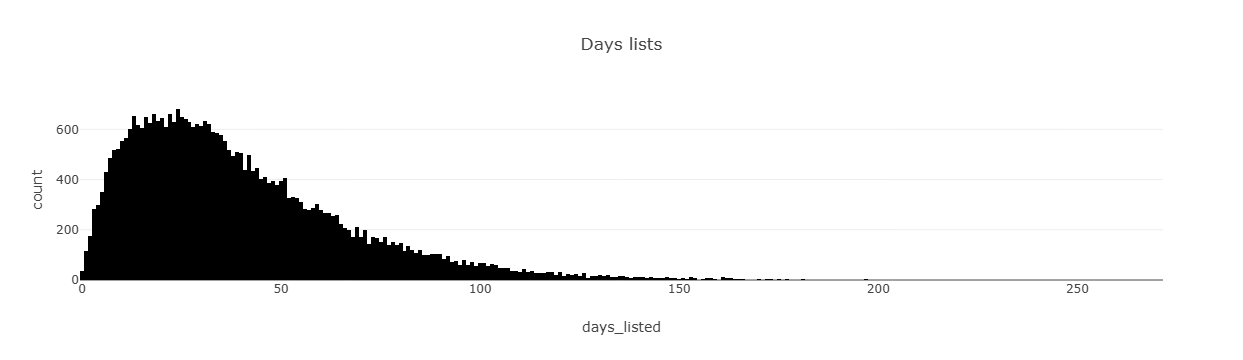

In [24]:
fig = px.histogram(clean_df, x='days_listed', title='Days lists')
fig.show()

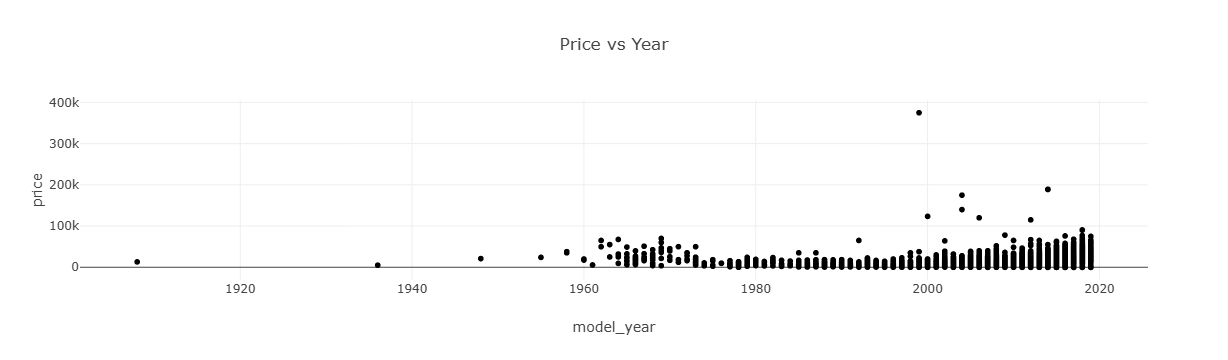

In [25]:
# Price vs Year relationship
# Two columns: one for x-axis, one for y-axis
fig = px.scatter(clean_df, x='model_year', y='price', 
                 title='Price vs Year')
fig.show()

2025-08-09 14:46:10.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 14:46:10.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 14:46:10.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 14:46:10.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-09 14:46:10.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


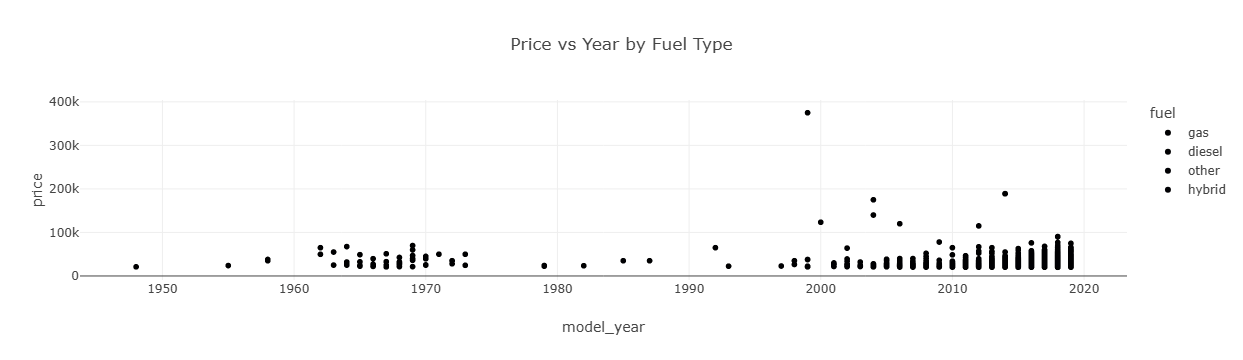

In [44]:
# Price vs Year by Fuel Type relationship
# 3 Three columns: x, y, and color
fig3 = px.scatter(clean_df[clean_df.price > 20000], x='model_year', y='price', color='fuel',
                 title='Price vs Year by Fuel Type')
st.plotly_chart(fig3, key="fig3_chart")
fig3.show()

In [ ]:
# Four columns: x, y, color, and size
fig = px.scatter(clean_df, x='model_year', y='price', color='fuel', size='odometer',
                 title='Price vs Year by Fuel Type and Mileage')
fig.show()